In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_blobs

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
airbnb_df = pd.read_csv(Path('/Users/Emily/downloads/cleaned_airbnb_dataset.csv'))
airbnb_df.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,4897143,22931450,Shared room,North Beach,93,4.5,4,1.0,147.0
1,4670847,22931450,Shared room,North Beach,115,4.5,4,1.0,137.0
2,6750199,25714209,Shared room,Downtown/Civic Center,4,5.0,2,1.0,145.0
3,11461771,9744251,Shared room,Downtown/Civic Center,8,4.0,14,1.0,138.0
4,259622,329072,Shared room,Financial District,125,4.5,4,1.0,90.0


<function matplotlib.pyplot.show(*args, **kw)>

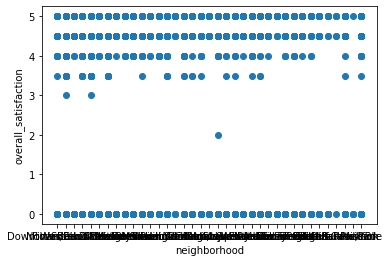

In [4]:
plt.scatter(airbnb_df.neighborhood, airbnb_df.overall_satisfaction)
plt.xlabel('neighborhood')
plt.ylabel('overall_satisfaction')
plt.show

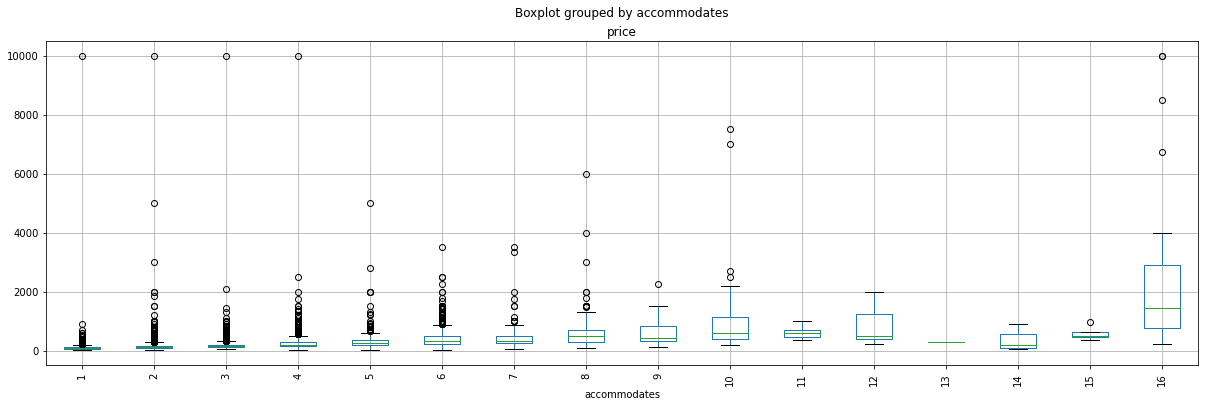

In [5]:
# price by accommodation amount
airbnb_df.boxplot(column='price', by='accommodates', figsize=(20,6), rot=90)

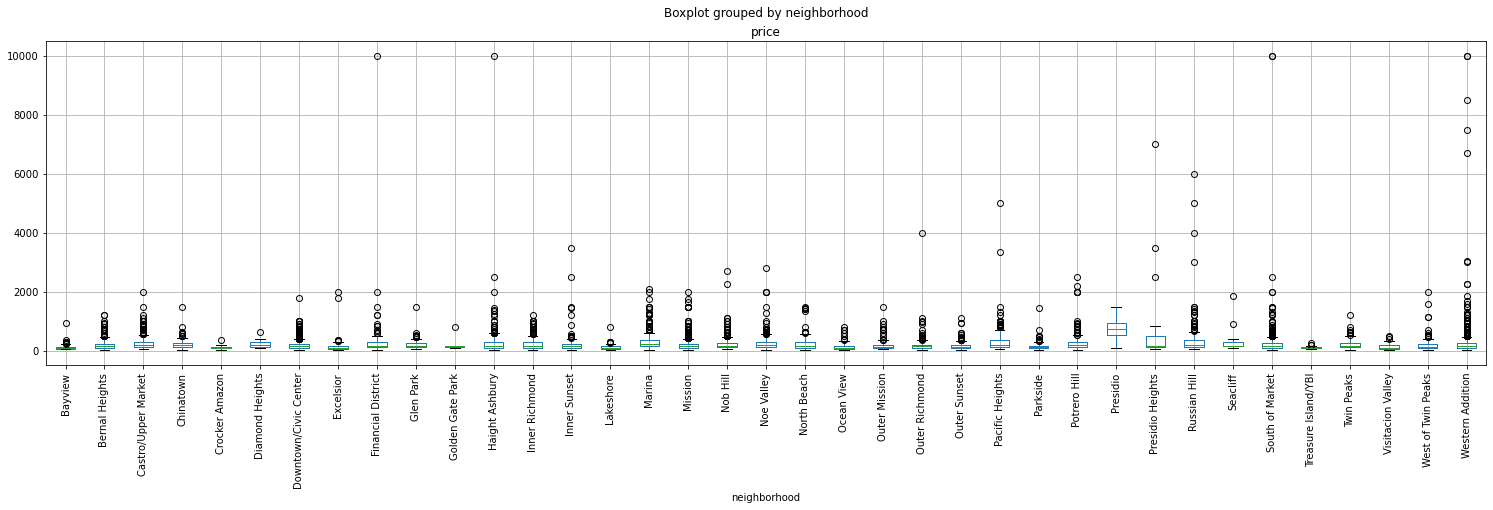

In [6]:
# price by neighborhood
airbnb_df.boxplot(column='price', by='neighborhood', figsize=(25,6), rot=90);

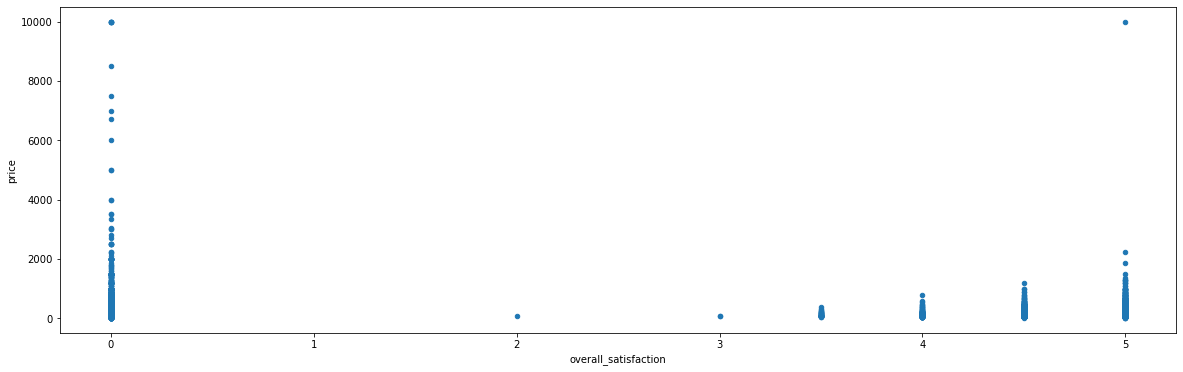

In [7]:
# price by satisfaction
airbnb_df.plot.scatter(x='overall_satisfaction', y='price', figsize=(20,6));

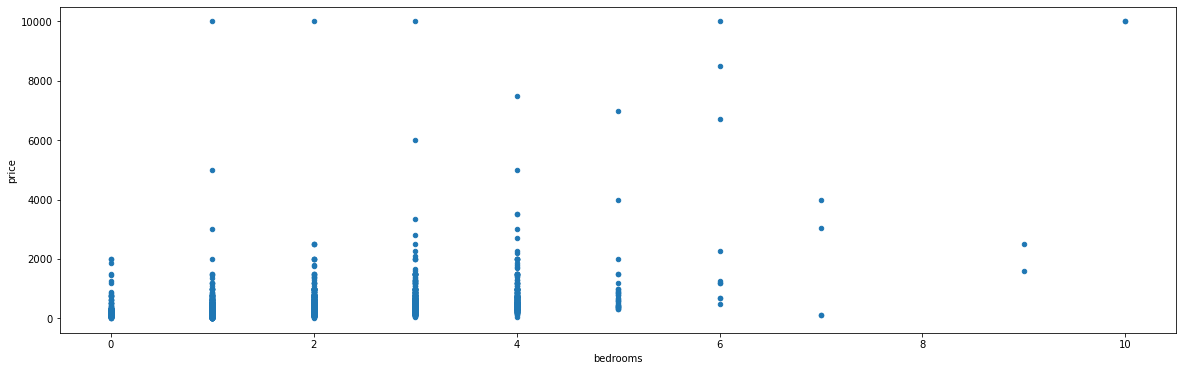

In [8]:
# price by bedrooms
airbnb_df.plot.scatter(x='bedrooms', y='price', figsize=(20,6));

In [9]:
X = airbnb_df.accommodates.values.reshape(-1, 1)

In [10]:
X.shape

(8344, 1)

In [11]:
y = airbnb_df.price

In [12]:
model = LinearRegression()

In [13]:
# training model
model.fit(X, y)

LinearRegression()

In [14]:
# create predictions
y_pred = model.predict(X)
print(y_pred.shape)

(8344,)


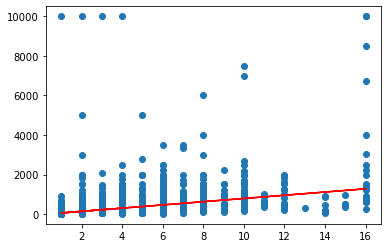

In [15]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [16]:
print(model.coef_)
print(model.intercept_)

[81.42199617]
-23.562747965816726


In [17]:
# let's see if logistic regression is good
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [19]:
# is it a one or an L for ratio?
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
   intercept_scaling=1, l1_ratio=None, max_iter=100,
   multi_class='warn', n_jobs=None, penalty='12',
   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
   warm_start=False)

LogisticRegression(multi_class='warn', penalty='12', random_state=1)